<a href="https://colab.research.google.com/github/AbyssGazer-Oliver/Machine-Learning/blob/main/lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import os
from six.moves import urllib

for fn_dst in ['exp1.csv', 'exp2.csv']:
    fn_src = 'https://raw.githubusercontent.com/sdrangan/introml/master/unit03_mult_lin_reg/%s' % fn_dst

    if os.path.isfile(fn_dst):
        print('File %s is already downloaded' % fn_dst)
    else:
        print('Downloaded %s' % fn_dst)
        urllib.request.urlretrieve(fn_src, fn_dst)

Downloaded exp1.csv
Downloaded exp2.csv


In [ ]:
names =[
    't',                                  # Time (secs)
    'q1', 'q2', 'q3',                     # Joint angle   (rads)
    'dq1', 'dq2', 'dq3',                  # Joint velocity (rads/sec)
    'I1', 'I2', 'I3',                     # Motor current (A)
    'eps21', 'eps22', 'eps31', 'eps32',   # Strain gauge measurements ($\mu$m /m )
    'ddq1', 'ddq2', 'ddq3'                # Joint accelerations (rad/sec^2)
]
# TODO 1
df = pd.read_csv('exp1.csv',header=None,index_col=0,names=names,na_values='?')

In [ ]:
# TODO 2
print(df.head(6))

            q1      q2      q3  ...          ddq1           ddq2          ddq3
t                               ...                                           
0.00 -0.000007  2.4958 -1.1345  ... -9.904900e-19 -6.210306e-319  4.917400e-27
0.01 -0.000007  2.4958 -1.1345  ...  4.248100e-19 -1.766878e-319 -1.381100e-27
0.02 -0.000007  2.4958 -1.1345  ...  3.233800e-19 -4.990557e-320 -4.117300e-28
0.03 -0.000007  2.4958 -1.1345  ...  1.500500e-19 -1.394253e-320 -1.173100e-28
0.04 -0.000007  2.4958 -1.1345  ...  5.932400e-20 -3.581976e-321 -3.770800e-01
0.05 -0.000007  2.4958 -1.1345  ...  2.164600e-20 -1.141292e-321  2.930300e-01

[6 rows x 16 columns]


Text(0, 0.5, 'I2')

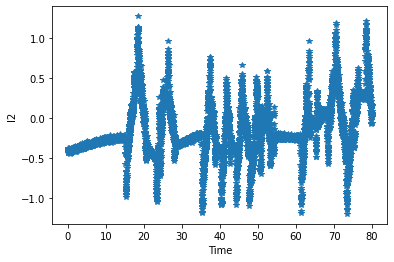

In [ ]:
# TODO 3
y=df['I2']
t=df.index
plt.plot(t,y,'*')
plt.xlabel('Time')
plt.ylabel('I2')

In [ ]:
# TODO 4
ytrain = df['I2']
Xtrain = df[['q2','dq2','eps21', 'eps22', 'eps31', 'eps32','ddq2']]


In [ ]:
from sklearn import linear_model

# Create linear regression object
# TODO 5
regr = linear_model.LinearRegression()

In [ ]:
# TODO 6
regr.fit(Xtrain,ytrain)

LinearRegression()

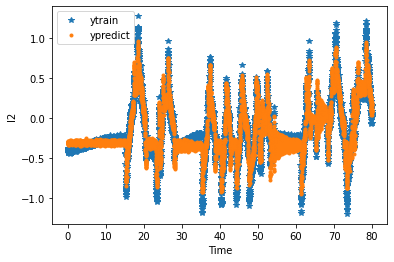

In [ ]:
# TODO 7
ytrain_pred = regr.predict(Xtrain)
plt.plot(t,ytrain,'*',label='ytrain')
plt.plot(t,ytrain_pred,'.',label='ypredict')
plt.xlabel('Time')
plt.ylabel('I2')
plt.legend()

In [ ]:
# TODO 8
RSS_train = np.mean((ytrain-ytrain_pred)**2)/np.std(ytrain)**2
print(RSS_train)

0.09583263861233195


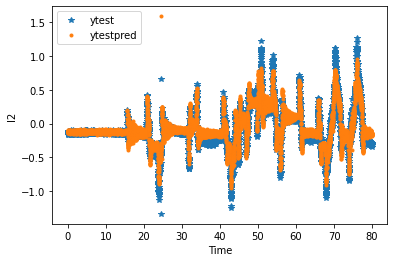

In [ ]:
# TODO 9
df2 = pd.read_csv('exp2.csv',header=None,index_col=0,names=names,na_values='?')
ytest = df2['I2']
Xtest = df2[['q2','dq2','eps21', 'eps22', 'eps31', 'eps32','ddq2']]
ytest_pred=regr.predict(Xtest)
plt.plot(t,ytest,'*',label='ytest')
plt.plot(t,ytest_pred,'.',label='ytestpred')
plt.xlabel('Time')
plt.ylabel('I2')
plt.legend()

In [ ]:
# TODO 10
RSS_test = np.mean((ytest-ytest_pred)**2)/np.std(ytest)**2
print(RSS_test)

0.12678048804762485
